In [44]:
!pip install numpy
!pip install matplotlib
!pip install shapely

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

In [46]:
def generate_mesh_within_polygon(polygon, cell_size):
    '''

    this function generates a mesh inside given polygon

    '''


    x_min, y_min, x_max, y_max = polygon.bounds
    x_coords = np.arange(x_min, x_max, cell_size)
    y_coords = np.arange(y_min, y_max, cell_size)

    mesh = []
    for x in x_coords:
        for y in y_coords:
            cell_center = Point(x + cell_size / 2, y + cell_size / 2)
            if polygon.contains(cell_center):
                mesh.append(Polygon([
                    (x, y),
                    (x + cell_size, y),
                    (x + cell_size, y + cell_size),
                    (x, y + cell_size)
                ]))

    return mesh

In [47]:
# Create a polygon 
# polygon = Polygon([(0, 0), (0, 10), (10, 10), (10, 0)])
polygon = Polygon([(0, 0), (10, 4), (10, 10), (0, 20)])


In [48]:
# Define cell size for the mesh
cell_size = 1

In [49]:
# Generate a mesh of cells within the polygon
mesh_cells = generate_mesh_within_polygon(polygon, cell_size)

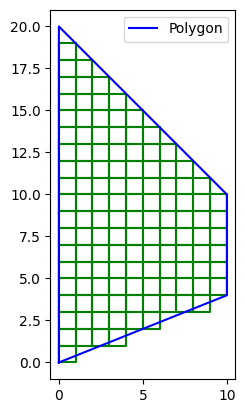

In [50]:
# Plot the polygon and mesh cells
fig, ax = plt.subplots()
for cell in mesh_cells:
    x, y = cell.exterior.xy
    ax.plot(x, y, color='green')
ax.plot(*polygon.exterior.xy, color='blue', label='Polygon')
ax.set_aspect('equal', 'box')
ax.legend()
plt.show()